In [1]:
import pickle
import json
import numpy as np
import pandas as pd

In [2]:
#!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [4]:
from Helper.metrics import ValidationAccuracyMultipleBySpecies
from Helper.metrics import ValidationAccuracyMultiple


In [5]:
# Import PyTorch
import torch
from torch import nn
import torch.optim as optim

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu126
torchvision version: 0.21.0+cu126


In [6]:
import os
num_cpu_cores = os.cpu_count()
print(f"Available CPU cores: {num_cpu_cores}")

Available CPU cores: 12


In [7]:
# Load from JSON file
with open(r"Data\species_universe.json", "r") as file:
    species_universe = json.load(file)
label_encoder = LabelEncoder()
label_encoder.fit(list(species_universe.keys()))
# Save the LabelEncoder
# with open('label_encoder.pkl', 'wb') as f:
#     pickle.dump(label_encoder, f)
for species, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{species}: {encoded_label}")

Abelmoschus esculentus: 0
Abelmoschus manihot: 1
Abies alba: 2
Abies amabilis: 3
Abies balsamea: 4
Abies cephalonica: 5
Abies concolor: 6
Abies grandis: 7
Abies homolepis: 8
Abies koreana: 9
Abies lasiocarpa: 10
Abies nordmanniana: 11
Abies procera: 12
Abies sachalinensis: 13
Abies sibirica: 14
Abies veitchii: 15
Abutilon mollissimum: 16
Abutilon theophrasti: 17
Acacia baileyana: 18
Acacia dealbata: 19
Acacia harpophylla: 20
Acaena alpina: 21
Acaena anserinifolia: 22
Acaena argentea: 23
Acaena buchananii: 24
Acaena caesiiglauca: 25
Acaena glabra: 26
Acaena inermis: 27
Acaena juvenca: 28
Acaena magellanica: 29
Acaena novae-zelandiae: 30
Acanthocalyx nepalensis: 31
Acanthus mollis: 32
Acanthus sennii: 33
Acanthus spinosus: 34
Acer barbinerve: 35
Acer campestre: 36
Acer griseum: 37
Acer japonicum: 38
Acer monspessulanum: 39
Acer negundo: 40
Acer obtusatum: 41
Acer palmatum: 42
Acer pictum: 43
Acer platanoides: 44
Acer pseudoplatanus: 45
Acer rubrum: 46
Acer rufinerve: 47
Acer saccharinum:

In [8]:
with open("Data\\Full_Scale\\vectorized_gbif_assemblages_climatic_1991-2018_32.pkl", "rb") as file:
    df = pickle.load(file)
df

,grid_index,year,species,longitude,latitude,climatic_map,species_vector
1,79231,2011,"[Angelica archangelica, Dactylorhiza majalis, ...",5.172939,59.201189,"[[[0.5050869, 0.0, 0.0, 0.0, 0.7999878, 0.0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,79231,2012,"[Carex distans, Euphrasia foulaensis, Carex ot...",5.172939,59.201189,"[[[0.709527, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,79231,2014,"[Lysimachia europaea, Ficaria verna, Juncus ar...",5.172939,59.201189,"[[[0.6718502, 0.0, 0.0, 0.0, 0.83332443, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,79231,2015,"[Tripolium pannonicum, Centaurium littorale, P...",5.172939,59.201189,"[[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,79231,2016,"[Lysimachia europaea, Lythrum salicaria, Vacci...",5.172939,59.201189,"[[[0.91899633, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
71740,1818627,2012,"[Avenella flexuosa, Lathyrus japonicus, Honcke...",30.835603,69.774990,"[[[0.6059245, 0.5373939, 0.49581122, 0.4746435...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71741,1818627,2017,"[Luzula spicata, Antennaria dioica, Cochlearia...",30.835603,69.774990,"[[[0.61264133, 0.53604275, 0.47785866, 0.41814...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71742,1820117,1994,"[Honckenya peploides, Alnus incana, Epilobium ...",30.847255,69.755439,"[[[0.6806042, 0.6014411, 0.50048757, 0.4638896...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71743,1821608,1994,"[Taraxacum spectabile, Astragalus norvegicus, ...",30.865522,69.744514,"[[[0.69237506, 0.60102916, 0.49402428, 0.45421...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


In [10]:
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)

# Now, split the temporary data into validation and test sets
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [11]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ClimaticDataset(Dataset):
    def __init__(self, df):
        self.data = torch.tensor(np.stack(df['climatic_map'].values).astype(np.float32)).to(device)  # Move data to GPU
        self.labels = torch.tensor(np.stack(df['species_vector'].values).astype(np.float32)).to(device)  # Move labels to GPU

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx].permute(2, 0, 1)  # Reshape to (C, H, W)
        label = self.labels[idx]  # Labels already on GPU
        return sample, label

In [12]:
# Create dataset
train_dataset = ClimaticDataset(train_df)
validation_dataset = ClimaticDataset(val_df)
test_dataset = ClimaticDataset(test_df)

In [13]:
# Create DataLoader
train_data = DataLoader(train_dataset, batch_size=32, shuffle=False, num_workers=0)  # No need for pin_memory here
validation_data = DataLoader(validation_dataset, batch_size=32, shuffle=False, num_workers=0)
test_data = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)
# Example usage
for batch in train_data:
    images, targets = batch
    print(images.shape)  # Should be (batch_size, 11, 16, 16)
    print(targets.shape)  # Should be (batch_size, num_classes)
    # To print the tensor values
    print("Sample image tensor (first image):", images[0])  # Print first image tensor in the batch
    print("Sample target (first label):", targets[0])  # Print first label in the batch
    break  # Stop after first batch

torch.Size([32, 11, 32, 32])
torch.Size([32, 5357])
Sample image tensor (first image): tensor([[[0.5199, 0.5712, 0.5423,  ..., 0.3234, 0.3208, 0.3436],
         [0.6354, 0.6971, 0.6569,  ..., 0.3407, 0.3022, 0.3023],
         [0.6719, 0.7356, 0.6882,  ..., 0.2639, 0.2520, 0.2560],
         ...,
         [0.3621, 0.1738, 0.2331,  ..., 0.5720, 0.4694, 0.4595],
         [0.2213, 0.2524, 0.3216,  ..., 0.7665, 0.6227, 0.6252],
         [0.3072, 0.3670, 0.4345,  ..., 0.6937, 0.5824, 0.5062]],

        [[0.7059, 0.6583, 0.6483,  ..., 0.7061, 0.6960, 0.6696],
         [0.5774, 0.5317, 0.5257,  ..., 0.7492, 0.7492, 0.7254],
         [0.5024, 0.4588, 0.4566,  ..., 0.8135, 0.8011, 0.7717],
         ...,
         [0.5863, 0.7225, 0.6839,  ..., 0.1599, 0.2210, 0.2530],
         [0.6843, 0.6702, 0.6207,  ..., 0.0894, 0.1567, 0.1848],
         [0.6070, 0.5706, 0.5205,  ..., 0.0926, 0.1508, 0.2044]],

        [[0.7263, 0.6768, 0.6664,  ..., 0.6928, 0.6835, 0.6576],
         [0.5990, 0.5502, 0.5431,  .

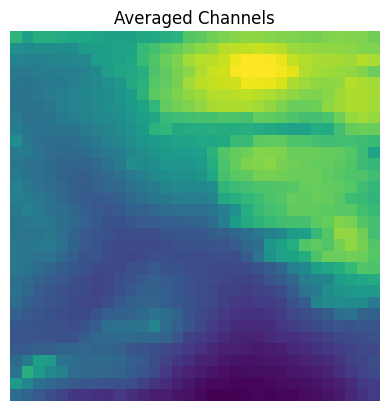

In [14]:
# Assuming `dataloader` is your DataLoader and it's already defined
# Get the first batch of data
data_iter = iter(train_data)
images, labels = next(data_iter)

# Get the first image (assuming the batch size is >= 1)
image = images[0].cpu().numpy()  # Move the image to CPU and convert to numpy

# Plotting the image
# Since the image is in (C, H, W) format, we need to reorder it to (H, W, C) for display
image = image.transpose(1, 2, 0)  # (C, H, W) -> (H, W, C)
# Average across channels to create a single image
image_avg = image.mean(axis=-1)  # Average along the last axis (channels)

# Plotting the average image
plt.imshow(image_avg, cmap='viridis')  # You can change the colormap
plt.title('Averaged Channels')
plt.axis('off')
plt.show()

In [17]:
df.iloc[0].climatic_map.shape,df.iloc[0].climatic_map

((32, 32, 11),
 array([[[5.05086899e-01, 0.00000000e+00, 0.00000000e+00, ...,
          1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [5.06583214e-01, 2.92468071e-03, 6.72245026e-03, ...,
          9.66484070e-01, 0.00000000e+00, 0.00000000e+00],
         [5.10772705e-01, 5.24401665e-03, 1.31132603e-02, ...,
          9.31797028e-01, 0.00000000e+00, 0.00000000e+00],
         ...,
         [5.44584274e-01, 1.81549311e-01, 2.45290041e-01, ...,
          3.26824188e-01, 0.00000000e+00, 0.00000000e+00],
         [5.37403107e-01, 1.97033405e-01, 2.59136438e-01, ...,
          3.23305130e-01, 0.00000000e+00, 0.00000000e+00],
         [5.33213615e-01, 2.12963581e-01, 2.72843122e-01, ...,
          3.23398590e-01, 0.00000000e+00, 0.00000000e+00]],
 
        [[5.08378983e-01, 2.60901451e-03, 6.44302368e-03, ...,
          9.66609955e-01, 0.00000000e+00, 0.00000000e+00],
         [5.15261650e-01, 5.03897667e-03, 1.27813816e-02, ...,
          9.33046341e-01, 0.00000000e+00, 0.0000000

### Resnet18

In [18]:
from torchvision import models
from torchvision.models import ResNet18_Weights

In [19]:
model = models.resnet18(weights = ResNet18_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Raul/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 97.2MB/s]


In [20]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [22]:
model.fc.in_features

512

### Let's build our model

In [24]:
class MLC(nn.Module):
    def __init__(self,num_classes):
        super(MLC, self).__init__()
        self.resnet = models.resnet18(weights = ResNet18_Weights.DEFAULT)
        self.in_features = self.resnet.fc.in_features
        self.resnet.fc= nn.Linear(self.in_features, num_classes)
    def forward(self,x):
        x = self.resnet(x)
        return x
        

In [25]:
model = MLC(num_classes = 10)

In [26]:
model.resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:
for name, param in model.resnet.named_parameters():
    print(name, param.requires_grad)

conv1.weight True
bn1.weight True
bn1.bias True
layer1.0.conv1.weight True
layer1.0.bn1.weight True
layer1.0.bn1.bias True
layer1.0.conv2.weight True
layer1.0.bn2.weight True
layer1.0.bn2.bias True
layer1.1.conv1.weight True
layer1.1.bn1.weight True
layer1.1.bn1.bias True
layer1.1.conv2.weight True
layer1.1.bn2.weight True
layer1.1.bn2.bias True
layer2.0.conv1.weight True
layer2.0.bn1.weight True
layer2.0.bn1.bias True
layer2.0.conv2.weight True
layer2.0.bn2.weight True
layer2.0.bn2.bias True
layer2.0.downsample.0.weight True
layer2.0.downsample.1.weight True
layer2.0.downsample.1.bias True
layer2.1.conv1.weight True
layer2.1.bn1.weight True
layer2.1.bn1.bias True
layer2.1.conv2.weight True
layer2.1.bn2.weight True
layer2.1.bn2.bias True
layer3.0.conv1.weight True
layer3.0.bn1.weight True
layer3.0.bn1.bias True
layer3.0.conv2.weight True
layer3.0.bn2.weight True
layer3.0.bn2.bias True
layer3.0.downsample.0.weight True
layer3.0.downsample.1.weight True
layer3.0.downsample.1.bias True
la

In [30]:
len(train_dataset)

41351

### The training Loop

In [31]:
device = torch.device('cuda:0')

In [33]:
num_classes = 5357
model = MLC(num_classes)
model = model.to(device)

eta = 0.00005
num_epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
dataloader = train_dataset
epoch_train_loss = []
#mlc_dataset.mode = 'train'

In [ ]:
for epoch in range(num_epochs):
    train_losses = []
    model.train()
    for D in dataloader:
        optimizer.zero_grad()
        data = D['images'].to(device, dtype = torch.float)
        labels = D['labels'].to(device, dtype = torch.float)
        error = nn.BCEWithLogitsLoss()
        loss = torch.sum(error(y_hat,labels))
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    epoch_train_loss.append(np.mean(train_losses))
    print(f'Train Epoch: {epoch+1} \t Train Loss:{np.mean(train_losses}) 

In [40]:
plt.plot(epoch_train_loss, label = 'train_loss', c = 'r')
plt.legend()
plt.grid()
plt.show()

AttributeError: 'tuple' object has no attribute 'label'